**Perceptron on IRIS dataset**

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

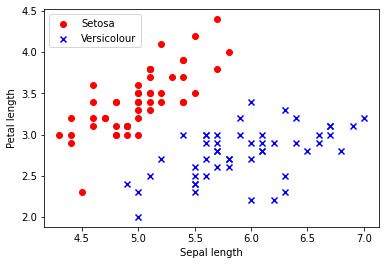

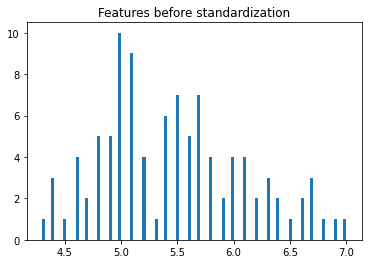

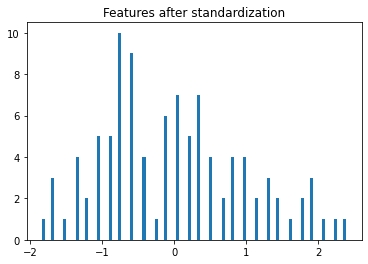

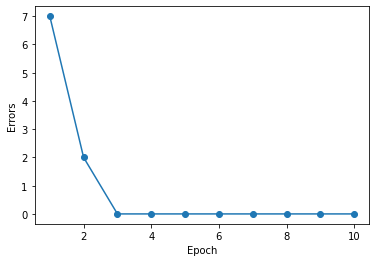

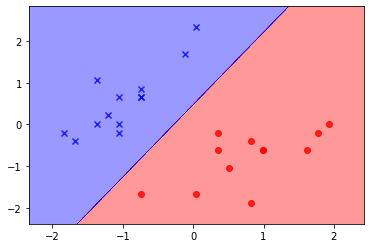

In [63]:
class Perceptron:
    def __init__(self, learning_rate=0.1):
        # instantiate a new Perceptron
        self.learning_rate = learning_rate
        self._b = 0.0             # y-intercept
        self._w = None            # weights assigned to input features
                                  # count of errors during each iteration
        self.misclassified_samples = []

    def fit(self, x: np.array, y: np.array, n_iter=10):
        # fit the Perceptron model on the training data
        # x = samples to fit the model on
        # y = labels of the training samples
        # n_iter = number of training iterations 

        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(n_iter):
            errors = 0               # counter of the errors during this training iteration
            for xi, yi in zip(x, y): # for each sample compute the update value
                update = self.learning_rate * (yi - self.predict(xi))
                                     # and apply it to the y-intercept and weights array
                self._b += update
                self._w += update * xi
                errors += int(update != 0.0)
            self.misclassified_samples.append(errors)

    def f(self, x: np.array) -> float:
        # compute the output of the neuron
        # x =  input features
        # return =  the output of the neuron

        return np.dot(x, self._w) + self._b

    def predict(self, x: np.array):
        # convert the output of the neuron to a binary output
        # x = input features
        # return 1 if the output for the sample is positive (or zero), -1 otherwise 
        return np.where(self.f(x) >= 0, 1, -1)

#----------------------------------------------------------------------------------------
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)    # download and convert the csv into a DataFrame
df.head()
#-----------------------------------------------------------------------------------------

x = df.iloc[:, 0:3].values # extract features
y = df.iloc[:, 4].values   # extract the label column

x = x[0:100, 0:2]          # reduce the dimensionality of the data
y = y[0:100]

plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Setosa')             # plot Iris Setosa samples
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='Versicolour') # plot Iris Versicolour samples
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='upper left')
plt.show()

from sklearn.model_selection import train_test_split
y = np.where(y == 'Iris-setosa', 1, -1)    # map the labels to a binary integer value
#-----------------standardization of the input features----------------------------------
plt.hist(x[:, 0], bins=100)
plt.title("Features before standardization")
plt.savefig("./before.png", dpi=300)
plt.show()

x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

plt.hist(x[:, 0], bins=100)
plt.title("Features after standardization")
plt.show()
#------------------------------------------------------------------------------------------

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
classifier = Perceptron(learning_rate=0.01)          # train the model
classifier.fit(x_train, y_train)

# plot the number of errors during each iteration
plt.plot(range(1, len(classifier.misclassified_samples) + 1), classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()


from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y):
    resolution = 0.001
    markers = ('o', 'x')
    cmap = ListedColormap(('red', 'blue'))
    
    # select a range of x containing the scaled test set
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    
    # create a grid of values to test the classifier on...
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # plot the decision region
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # ...and the points from the test set
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c1, 0], y=x[y == c1, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=c1)
    plt.show()

plot_decision_regions(x_test, y_test)

In [64]:
from sklearn.metrics import accuracy_score
print("accuracy:  %f" % accuracy_score(classifier.predict(x_test), y_test))

accuracy:  1.000000


**MLP on IRIS Dataset**

In [65]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
iris_data = load_iris()

In [66]:
random.seed(123)
# splitting dataset into training and testing
def separate_data():
    A = iris_dataset[0:40]
    a = iris_dataset[40:50]
    B = iris_dataset[50:90]
    b = iris_dataset[90:100]
    C = iris_dataset[100:140]
    c = iris_dataset[140:150]
    train = np.concatenate((A,B,C))
    test =  np.concatenate((a,b,c))
    return train,test

train_porcent = 80 # Porcent Training 
test_porcent = 20 # Porcent Test
iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Join X and Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)

Filetrain, Filetest = separate_data()

train_X = np.array([i[:4] for i in Filetrain])
train_y = np.array([i[4] for i in Filetrain])
test_X = np.array([i[:4] for i in Filetest])
test_y = np.array([i[4] for i in Filetest])

Text(0, 0.5, 'petal width (cm)')

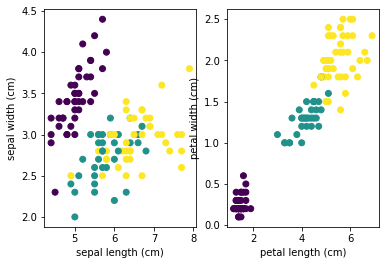

In [67]:
#plot the training samples
import matplotlib.cm as cm
plt.subplot(1, 2, 1)
plt.scatter(train_X[:,0],train_X[:,1],c=train_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])

plt.subplot(1, 2, 2)
plt.scatter(train_X[:,2],train_X[:,3],c=train_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])

Text(0, 0.5, 'petal width (cm)')

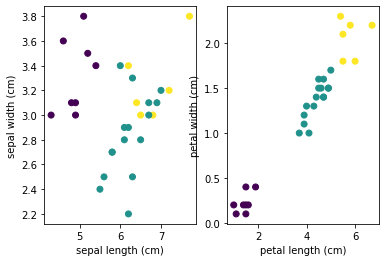

In [68]:
#plot the testing samples
plt.subplot(1, 2, 1)
plt.scatter(test_X[:,0],test_X[:,1],c=test_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1]) 

plt.subplot(1, 2, 2)
plt.scatter(test_X[:,2],test_X[:,3],c=test_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])

In [69]:
class MultiLayerPerceptron: 
    def __init__(self, params=None):
                                                         # defaulf MLP Layer if not specify
        if (params == None):
            self.inputLayer = 4                          # Input Layer
            self.hiddenLayer = 5                         # Hidden Layer
            self.outputLayer = 3                         # Outpuy Layer
            self.learningRate = 0.005                    # Learning rate
            self.max_epochs = 600                        # Epochs
            self.BiasHiddenValue = -1                    # Bias HiddenLayer
            self.BiasOutputValue = -1                    # Bias OutputLayer
            self.activation = self.activation['sigmoid'] # Activation function
            self.deriv = self.deriv['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epochs']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.activation[params['ActivationFunction']]
            self.deriv = self.deriv[params['ActivationFunction']]
        
                                                        # initialize Weight and Bias value
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3 
        
    pass
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    # activation and derivation function based on maths formula
    activation = {'sigmoid': (lambda x: 1/(1 + np.exp(-x * 1.0))),'tanh': (lambda x: np.tanh(x)), 'Relu': (lambda x: x*(x > 0)) }
    deriv = {'sigmoid': (lambda x: x*(1-x)), 'tanh': (lambda x: 1-x**2), 'Relu': (lambda x: 1 * (x>0)) }
    
    # Backpropagation process algoritm
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        # level 1 -> Error - OutputLayer
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        
        # level 2 -> Update weights OutputLayer and HiddenLayer
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        # level 3 -> Error - HiddenLayer
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        # level 4 -> Update weights HiddenLayer and InputLayer(x)
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
    
    # plot error value for each epoch
    def show_err_graphic(self,v_error,v_epoch):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoch, v_error, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()
    
    # predict function for prediction test data
    def predict(self, X, y):
        my_predictions = []
        
        #Forward propagation
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        # Print predictions    
        print(" Number of Sample            | Class                 |     Output           |  Expected Output")   
        for i in range(len(my_predictions)):
            if(my_predictions[i] == 0): 
                print("id:{}                         | Iris-Setosa           |  Predicted Output: {} | Expected Output:{}  ".format(i, my_predictions[i], y[i]))
            elif(my_predictions[i] == 1): 
                print("id:{}                         | Iris-Versicolour      |  Predicted Output: {} | Expected Output:{} ".format(i, my_predictions[i], y[i]))
            elif(my_predictions[i] == 2): 
                print("id:{}                         | Iris-Iris-Virginica   |  Predicted Output: {} | Expected Output:{} ".format(i, my_predictions[i], y[i]))
                
        return my_predictions
        pass

    # fit function for training process with train data
    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X);
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                
                # level 1  (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                
                # level 2  One-Hot-Encoding
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}
                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                # Backpropagation : Update Weights
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            
            # Print error value for each epoch
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1
            
        self.show_err_graphic(error_array,epoch_array)
        
        # Print weight Hidden layer acquire during training
        print('')
        print('weight value of Hidden layer during training: ')
        print(W0[0])
        
        # Plot weight Output layer acquire during training
        print('')
        print('weight value of Output layer during training: ')
        print(W1[0])

        return self

Epoch  1 - Total Error:  0.08939914265311076
Epoch  50 - Total Error:  0.05376852115527734
Epoch  100 - Total Error:  0.03773105860576401
Epoch  150 - Total Error:  0.031164450497282094
Epoch  200 - Total Error:  0.028406909135682057
Epoch  250 - Total Error:  0.026692561942141566
Epoch  300 - Total Error:  0.02524003405939521
Epoch  350 - Total Error:  0.02384525367109565
Epoch  400 - Total Error:  0.022427464754471375
Epoch  450 - Total Error:  0.02094841588662415
Epoch  500 - Total Error:  0.01936513137210059
Epoch  550 - Total Error:  0.01759742449392902
Epoch  600 - Total Error:  0.0157921705956492


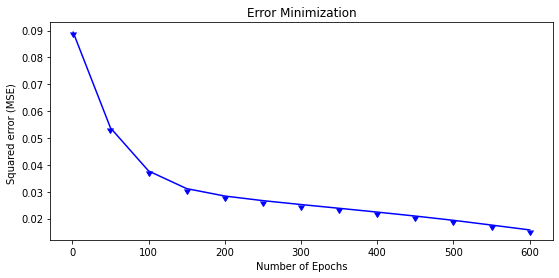


weight value of Hidden layer during training: 
[[-1.0264364963591768, -1.005378008769932, 1.1040970324666408, -0.9438509763726575, 0.2477341859518308], [-1.6607236576849167, -0.5271074164872894, 0.7976213383763496, 0.11106445175251951, 0.49150762681953136], [2.032242043878212, 2.5275909820775295, -1.7742581452377835, -0.22643364585324893, -0.9447641757850496], [0.8274442502250032, 0.544902904567468, -0.4176102462987161, 0.6713496504613647, -0.26302362790003486]]

weight value of Output layer during training: 
[[-1.690259098247011, -2.4405306035404433, 1.860673226908258], [-3.3013574651308413, 1.3363075286576447, 0.9802351317690516], [1.6241501247416688, -0.17113179167192558, -3.3234269607946656], [-0.03805312167147644, 0.4181709110950723, 0.3599075984406385], [1.023168230324138, -1.6169851651732854, -1.5602263532718004]]


In [70]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3, 'Epochs':600, 'LearningRate':0.005,'BiasHiddenValue':-1, 'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}
Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

In [71]:
pred = Perceptron.predict(test_X,test_y)

pred = np.array(pred)
true = test_y.astype('int')

 Number of Sample            | Class                 |     Output           |  Expected Output
id:0                         | Iris-Setosa           |  Predicted Output: 0 | Expected Output:0.0  
id:1                         | Iris-Versicolour      |  Predicted Output: 1 | Expected Output:1.0 
id:2                         | Iris-Versicolour      |  Predicted Output: 1 | Expected Output:1.0 
id:3                         | Iris-Setosa           |  Predicted Output: 0 | Expected Output:0.0  
id:4                         | Iris-Versicolour      |  Predicted Output: 1 | Expected Output:1.0 
id:5                         | Iris-Versicolour      |  Predicted Output: 1 | Expected Output:1.0 
id:6                         | Iris-Versicolour      |  Predicted Output: 1 | Expected Output:1.0 
id:7                         | Iris-Versicolour      |  Predicted Output: 1 | Expected Output:1.0 
id:8                         | Iris-Setosa           |  Predicted Output: 0 | Expected Output:0.0  
id:9       

In [72]:
def compute_confusion_matrix(true, pred):
    K = len(np.unique(true))        # Number of classes 
    result = np.zeros((K, K))
    for i in range(len(true)):
        result[true[i]][pred[i]] += 1
    return result
conf_matrix = compute_confusion_matrix(true, pred)

def accuracy_average(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print('Average accuracy:  ', accuracy_average(conf_matrix))


Average accuracy:   0.9333333333333333
